# Imports

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
file_path="E:\\Data Science Projects\\Self learning projecs\\Customer Segmentation\\ulabox_orders_with_categories_partials_2017.csv"
df=pd.read_csv(file_path)
df.head()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0



1. customer is the unique customer id. <br>
2. order is the unique order id. <br>
3. total_items is the number of products bought in the order. <br>
4. discount% is the amount of discount provided during the purchase, the negative values in discount stands for extra amount the customer paid to ulabox as delivery charge or any other mode of fee. <br>
5. weekday is the day of the week in which the order was placed.<br>
6. hour is the time in which the order is placed. <br>
7. Food% is the amount of money spent on non fresh food in the purchase, it may include grocery products like sugar, coffee  powder, oats etc.<br>
8. Fresh% is the amount of money spent on fresh food like milk, fruits, vegetables etc.<br>
9. Drinks% is most probably the percentage of amount spent on alchohol like wine, vodka, scotch etc. There is a teeny tiny chance that these also include soft drinks.<br>
10. Home% is the percentage of money spent in home accessories.<br>
11. Beauty% is the percentage of amount spent in beauty products<br>
12. Health% is the percentage of amount spent in medicine or health products like protein supplement, carb supplement etc.<br>
13. Baby% is the percentage spent in baby products.<br>
14. Pets% is the percentage spent in pet products like pedigree.


# Explore the data 

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer     30000 non-null  int64  
 1   order        30000 non-null  int64  
 2   total_items  30000 non-null  int64  
 3   discount%    30000 non-null  float64
 4   weekday      30000 non-null  int64  
 5   hour         30000 non-null  int64  
 6   Food%        30000 non-null  float64
 7   Fresh%       30000 non-null  float64
 8   Drinks%      30000 non-null  float64
 9   Home%        30000 non-null  float64
 10  Beauty%      30000 non-null  float64
 11  Health%      30000 non-null  float64
 12  Baby%        30000 non-null  float64
 13  Pets%        30000 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 3.2 MB


* We have 14 columns
* All columns have numerical datatype


### Check for Null values 

In [81]:
df.isna().sum()

customer       0
order          0
total_items    0
discount%      0
weekday        0
hour           0
Food%          0
Fresh%         0
Drinks%        0
Home%          0
Beauty%        0
Health%        0
Baby%          0
Pets%          0
dtype: int64

* No null values

### Check for duplicates 

In [82]:
df.duplicated().sum()

np.int64(0)

* No duplicates

### Check for unique values Percentage

In [83]:
columns=df.columns
for col in columns:
    print(f"{col} : {df[col].nunique()/len(df)*100:.2f}% ")

customer : 34.13% 
order : 100.00% 
total_items : 0.58% 
discount% : 11.93% 
weekday : 0.02% 
hour : 0.08% 
Food% : 21.15% 
Fresh% : 23.34% 
Drinks% : 22.38% 
Home% : 18.04% 
Beauty% : 10.53% 
Health% : 5.63% 
Baby% : 15.59% 
Pets% : 4.65% 


* The data set has 34.13% unique customers , since the task is for customers sigmentation , we need to combine all orders for each customer to represent one record for each customer 
* To do this , there is some columns we need to drop , like : 'order','customer','weekday' ,'hour','discount%'
* Then combine the other features 
    * sum total items for each ordersper customer
    * handle each type of the the groceries percentage 
        * calculate the weight of each type (eg: food% /100* total_items)
        * drop the original % cols
        * Use the sum aggregation 
        * then recalculate the percentage for all the oders the customer ordered

In [84]:
df.drop(['weekday' ,'hour','discount%'],axis=1,inplace=True)
df.columns

Index(['customer', 'order', 'total_items', 'Food%', 'Fresh%', 'Drinks%',
       'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%'],
      dtype='object')

In [85]:
perecent_cols= [ 'Food%', 'Fresh%', 'Drinks%', 'Home%','Beauty%', 'Health%', 'Baby%', 'Pets%']
for col in perecent_cols:
    df[f"weighted_{col}"] = round((df[col]/100)*df['total_items'])

df.head()

,customer,order,total_items,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,weighted_Food%,weighted_Fresh%,weighted_Drinks%,weighted_Home%,weighted_Beauty%,weighted_Health%,weighted_Baby%,weighted_Pets%
0,0,0,45,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0,4.0,39.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0,1,38,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0,6.0,29.0,2.0,1.0,0.0,0.0,0.0,0.0
2,0,2,51,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0,9.0,29.0,2.0,8.0,3.0,0.0,0.0,0.0
3,1,3,57,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0,16.0,21.0,7.0,3.0,2.0,9.0,0.0,0.0
4,1,4,53,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0,13.0,32.0,4.0,4.0,0.0,0.0,0.0,0.0


In [86]:
df.drop(perecent_cols,axis=1,inplace=True)
df.head()

,customer,order,total_items,weighted_Food%,weighted_Fresh%,weighted_Drinks%,weighted_Home%,weighted_Beauty%,weighted_Health%,weighted_Baby%,weighted_Pets%
0,0,0,45,4.0,39.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0,1,38,6.0,29.0,2.0,1.0,0.0,0.0,0.0,0.0
2,0,2,51,9.0,29.0,2.0,8.0,3.0,0.0,0.0,0.0
3,1,3,57,16.0,21.0,7.0,3.0,2.0,9.0,0.0,0.0
4,1,4,53,13.0,32.0,4.0,4.0,0.0,0.0,0.0,0.0


In [91]:
weighted_cols=['weighted_Food%', 'weighted_Fresh%',
       'weighted_Drinks%', 'weighted_Home%', 'weighted_Beauty%',
       'weighted_Health%', 'weighted_Baby%', 'weighted_Pets%']

In [94]:
df=df.groupby('customer').agg(
    {
    'order': 'count',         
    'total_items': 'sum',          
    'weighted_Food%' : 'sum',
    'weighted_Fresh%' : 'sum',
    'weighted_Drinks%': 'sum',
    'weighted_Home%': 'sum', 
    'weighted_Beauty%': 'sum',
    'weighted_Health%': 'sum',
    'weighted_Baby%': 'sum',
    'weighted_Pets%': 'sum'}
)
df.head()

,order,total_items,weighted_Food%,weighted_Fresh%,weighted_Drinks%,weighted_Home%,weighted_Beauty%,weighted_Health%,weighted_Baby%,weighted_Pets%
customer,,,,,,,,,,
0,3,134,19.0,97.0,6.0,9.0,3.0,0.0,0.0,0.0
1,20,623,121.0,317.0,99.0,24.0,18.0,32.0,10.0,0.0
2,1,26,6.0,6.0,10.0,4.0,0.0,0.0,0.0,0.0
3,23,639,157.0,345.0,60.0,63.0,0.0,0.0,16.0,0.0
4,29,496,98.0,297.0,63.0,34.0,4.0,0.0,1.0,0.0


In [97]:
df=df.rename(columns={'order':'total_orders'})
df.head()

,total_orders,total_items,weighted_Food%,weighted_Fresh%,weighted_Drinks%,weighted_Home%,weighted_Beauty%,weighted_Health%,weighted_Baby%,weighted_Pets%
customer,,,,,,,,,,
0,3,134,19.0,97.0,6.0,9.0,3.0,0.0,0.0,0.0
1,20,623,121.0,317.0,99.0,24.0,18.0,32.0,10.0,0.0
2,1,26,6.0,6.0,10.0,4.0,0.0,0.0,0.0,0.0
3,23,639,157.0,345.0,60.0,63.0,0.0,0.0,16.0,0.0
4,29,496,98.0,297.0,63.0,34.0,4.0,0.0,1.0,0.0


In [99]:
for col in weighted_cols:
    df[col[8:]]=round(df[col]/df['total_items'] *100 , 2)
df.head()

,total_orders,total_items,weighted_Food%,weighted_Fresh%,weighted_Drinks%,weighted_Home%,weighted_Beauty%,weighted_Health%,weighted_Baby%,weighted_Pets%,_Food%,_Fresh%,_Drinks%,_Home%,_Beauty%,_Health%,_Baby%,_Pets%
customer,,,,,,,,,,,,,,,,,,
0,3,134,19.0,97.0,6.0,9.0,3.0,0.0,0.0,0.0,14.18,72.39,4.48,6.72,2.24,0.00,0.00,0.0
1,20,623,121.0,317.0,99.0,24.0,18.0,32.0,10.0,0.0,19.42,50.88,15.89,3.85,2.89,5.14,1.61,0.0
2,1,26,6.0,6.0,10.0,4.0,0.0,0.0,0.0,0.0,23.08,23.08,38.46,15.38,0.00,0.00,0.00,0.0
3,23,639,157.0,345.0,60.0,63.0,0.0,0.0,16.0,0.0,24.57,53.99,9.39,9.86,0.00,0.00,2.50,0.0
4,29,496,98.0,297.0,63.0,34.0,4.0,0.0,1.0,0.0,19.76,59.88,12.70,6.85,0.81,0.00,0.20,0.0


In [100]:
df.drop(weighted_cols , axis= 1, inplace=True)
df.head()

,total_orders,total_items,_Food%,_Fresh%,_Drinks%,_Home%,_Beauty%,_Health%,_Baby%,_Pets%
customer,,,,,,,,,,
0,3,134,14.18,72.39,4.48,6.72,2.24,0.00,0.00,0.0
1,20,623,19.42,50.88,15.89,3.85,2.89,5.14,1.61,0.0
2,1,26,23.08,23.08,38.46,15.38,0.00,0.00,0.00,0.0
3,23,639,24.57,53.99,9.39,9.86,0.00,0.00,2.50,0.0
4,29,496,19.76,59.88,12.70,6.85,0.81,0.00,0.20,0.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10239 entries, 0 to 10238
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_orders  10239 non-null  int64  
 1   total_items   10239 non-null  int64  
 2   _Food%        10239 non-null  float64
 3   _Fresh%       10239 non-null  float64
 4   _Drinks%      10239 non-null  float64
 5   _Home%        10239 non-null  float64
 6   _Beauty%      10239 non-null  float64
 7   _Health%      10239 non-null  float64
 8   _Baby%        10239 non-null  float64
 9   _Pets%        10239 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 879.9 KB


* Now we have the info about all orders for each customer

### Explore correlation between Columns

<Axes: >

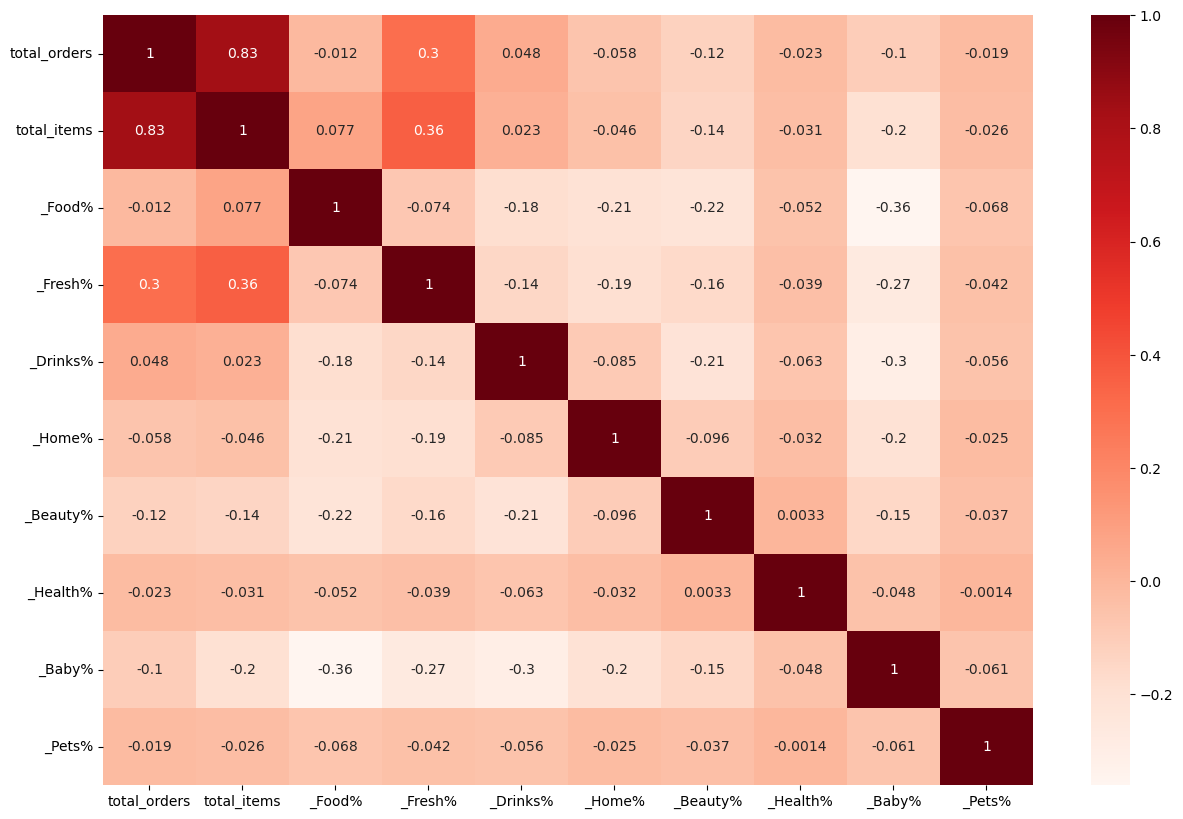

In [102]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='Reds')

* I think there is data leakage because of the total_items columns 

# Clustering using KMeans

In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def Explore_sils_inertias(df):
    # Iterate over a range of k clusters to find the optimal number of clusters
    ks = range(2,25)
    sils = []
    inertias = []
    for k in ks:
        kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
        kmeans.fit(df)
        sils.append(silhouette_score(df, kmeans.labels_))
        inertias.append(kmeans.inertia_)
    #plot inertias and silhouette scores for each number of clusters.
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    axes[0].plot(ks, sils)
    axes[0].set_title('Silhouette Scores')
    axes[0].set_xticks(ks)
    axes[1].plot(ks, inertias)
    axes[1].set_title('Inertia')
    axes[1].set_xticks(ks);

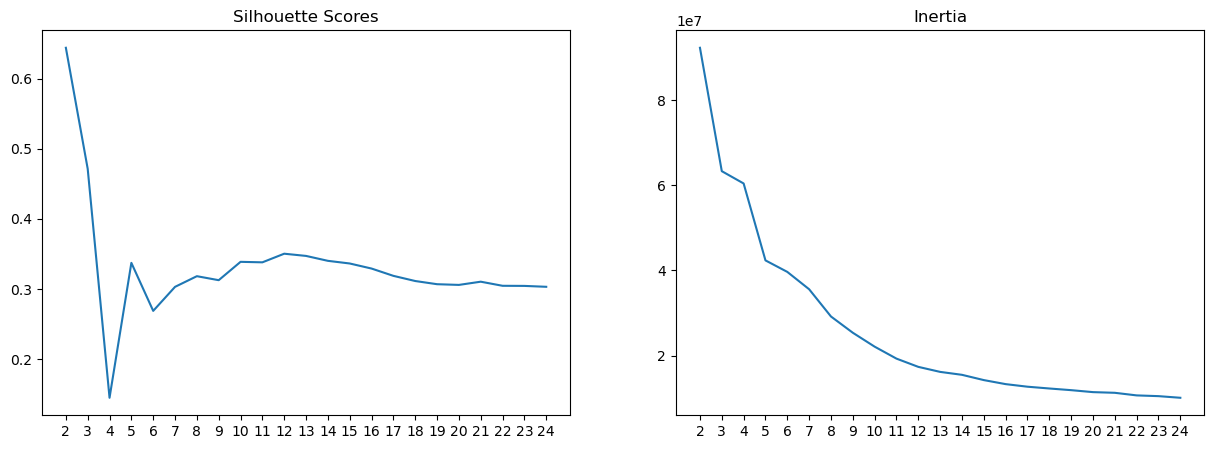

In [105]:
Explore_sils_inertias(df)


* I think 4-5 clusters are approperiate , since there is an elbow in the inertia , and the Silhouette Score is acceptable

## 5 Clusters

In [106]:
kmeans = KMeans(n_clusters=5, n_init= 'auto', random_state=42)
kmeans.fit(df)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,total_orders,total_items,_Food%,_Fresh%,_Drinks%,_Home%,_Beauty%,_Health%,_Baby%,_Pets%,cluster
customer,,,,,,,,,,,
0,3,134,14.18,72.39,4.48,6.72,2.24,0.00,0.00,0.0,3
1,20,623,19.42,50.88,15.89,3.85,2.89,5.14,1.61,0.0,1
2,1,26,23.08,23.08,38.46,15.38,0.00,0.00,0.00,0.0,0
3,23,639,24.57,53.99,9.39,9.86,0.00,0.00,2.50,0.0,1
4,29,496,19.76,59.88,12.70,6.85,0.81,0.00,0.20,0.0,2


In [ ]:
# Group the dataframe by cluster and aggregate by mean values
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups
     

,cluster,total_orders,total_items,_Food%,_Fresh%,_Drinks%,_Home%,_Beauty%,_Health%,_Baby%,_Pets%
0,0,1.616900,40.985972,27.848996,11.749439,24.832505,17.289137,11.789203,1.438661,3.402453,1.451393
1,1,15.691729,754.781955,23.372030,39.701128,17.142406,10.414436,3.762331,0.883459,3.825564,0.823158
2,2,9.047690,358.202683,26.054247,30.814188,20.634590,11.683487,3.961222,0.907407,5.105231,0.754382
3,3,4.594656,157.041214,26.651445,21.576028,25.142794,13.989176,4.923193,0.974941,5.751594,0.911929
4,4,1.626312,15.566586,3.103035,0.801977,4.686392,5.496513,2.195036,0.712938,82.398337,0.250977


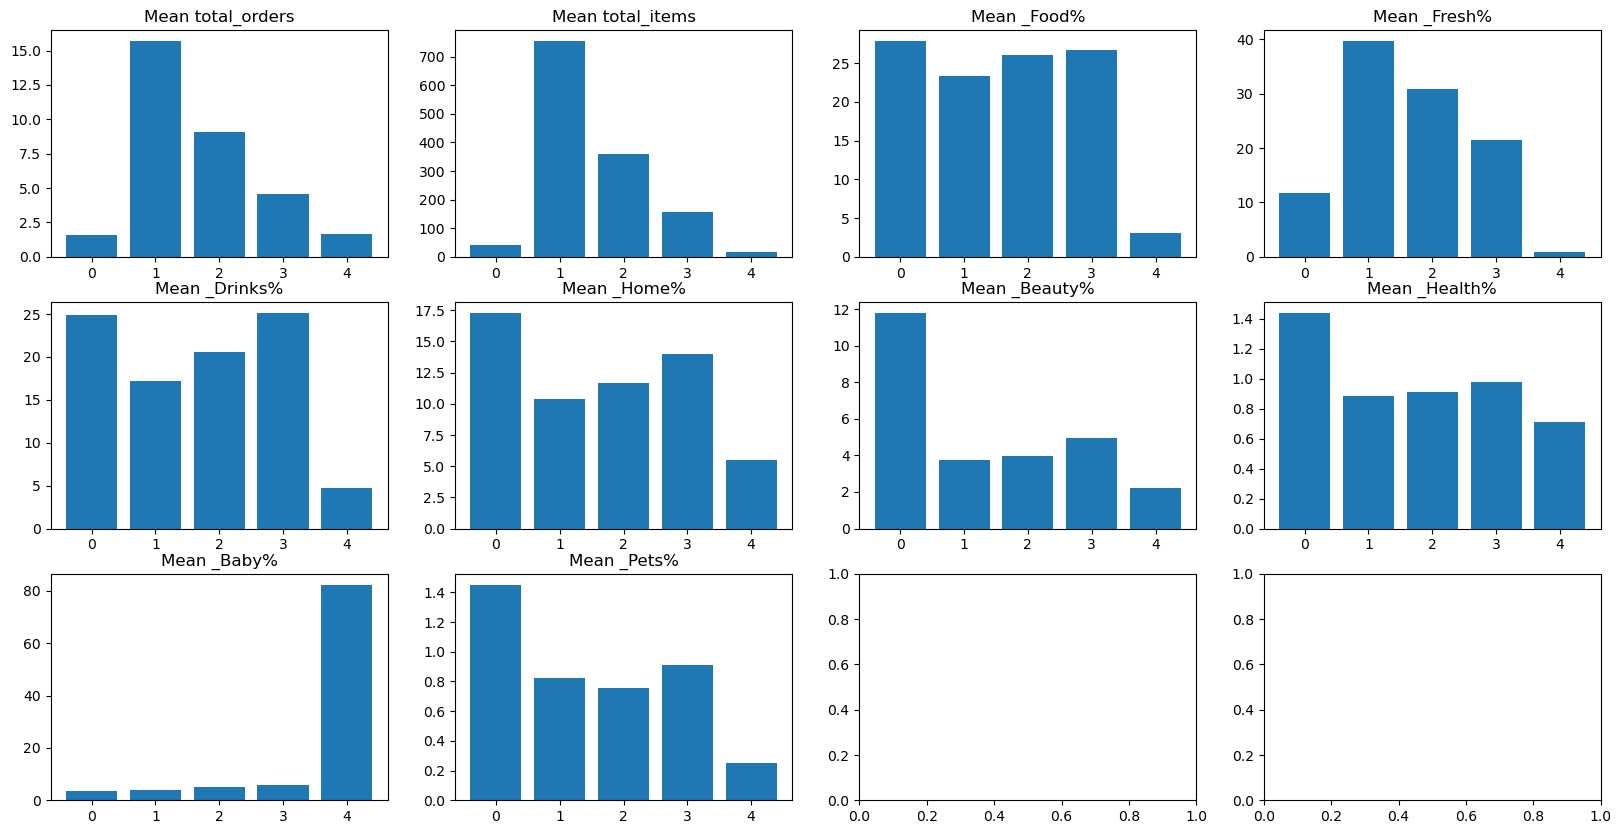

In [109]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

* Cluster 2 , 3 Have very close means in all of the features , so we will decrese the number of clusters to 4

## 4 Clusters

In [110]:
kmeans = KMeans(n_clusters=4, n_init= 'auto', random_state=42)
kmeans.fit(df)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,total_orders,total_items,_Food%,_Fresh%,_Drinks%,_Home%,_Beauty%,_Health%,_Baby%,_Pets%,cluster
customer,,,,,,,,,,,
0,3,134,14.18,72.39,4.48,6.72,2.24,0.00,0.00,0.0,2
1,20,623,19.42,50.88,15.89,3.85,2.89,5.14,1.61,0.0,1
2,1,26,23.08,23.08,38.46,15.38,0.00,0.00,0.00,0.0,3
3,23,639,24.57,53.99,9.39,9.86,0.00,0.00,2.50,0.0,1
4,29,496,19.76,59.88,12.70,6.85,0.81,0.00,0.20,0.0,1


In [111]:
# Group the dataframe by cluster and aggregate by mean values
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,total_orders,total_items,_Food%,_Fresh%,_Drinks%,_Home%,_Beauty%,_Health%,_Baby%,_Pets%
0,0,1.374795,28.596563,11.239075,3.177340,15.865736,52.682962,8.019018,1.260466,6.031097,1.577750
1,1,13.196875,585.112500,24.897781,36.375437,18.233844,10.953687,3.883531,0.843375,3.830125,0.902750
2,2,5.915254,216.332097,26.553819,24.786647,23.567299,13.204603,4.515032,0.948151,5.523448,0.811562
3,3,1.898810,47.228962,26.172224,12.134776,22.973520,8.464726,9.953860,1.288998,17.634814,1.157584


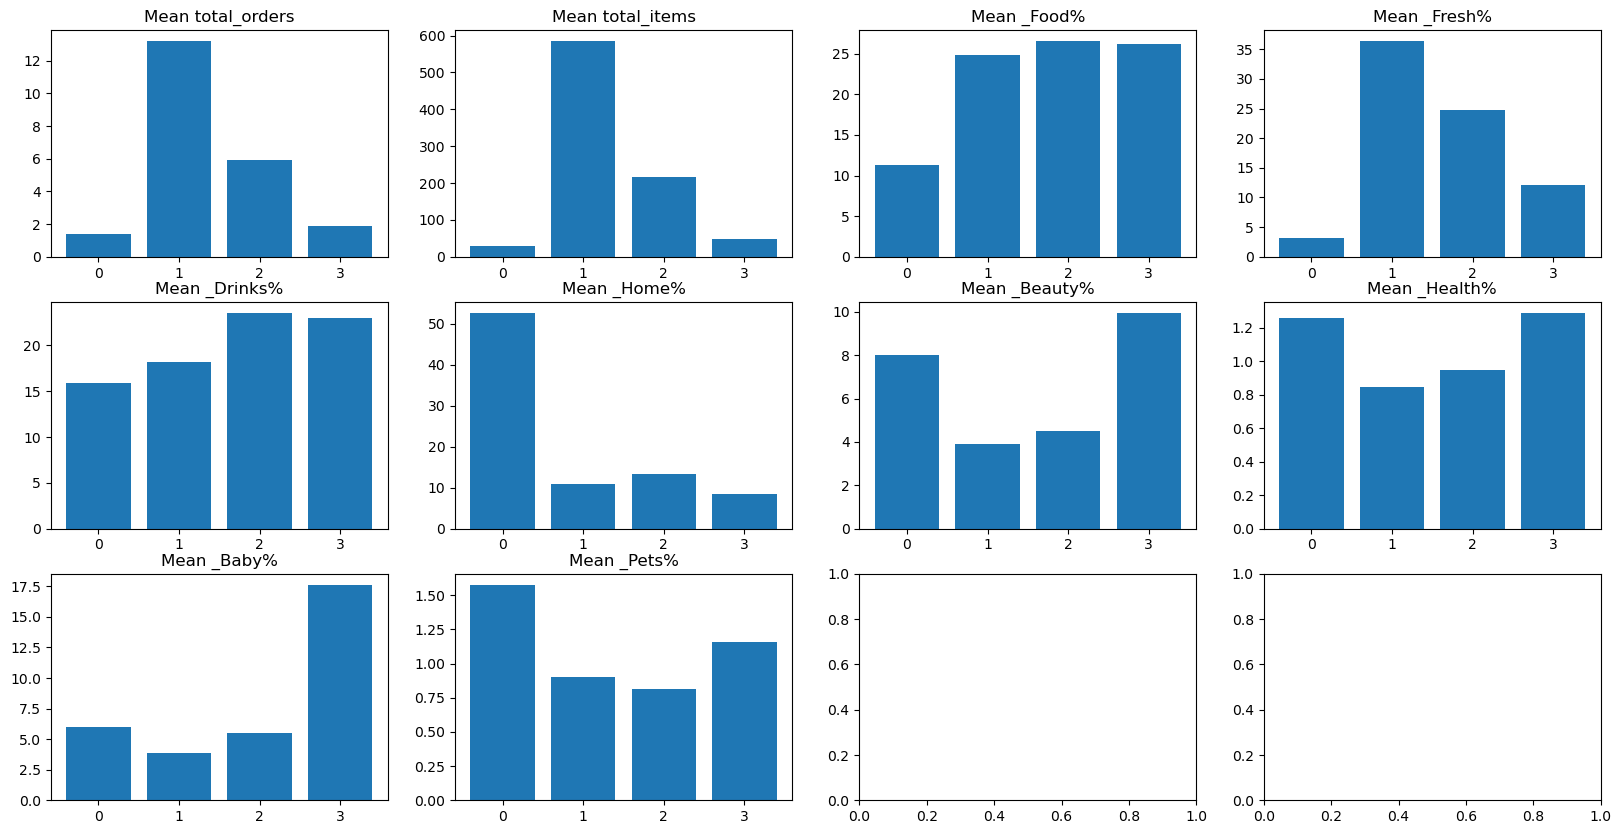

In [112]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

* Cluster 0 : 
    * Properties
        * less total orders 
        * less total items
        * high food items
        * less fresh items
        * moderate drinks items
        * highest home items
        * Moderate beaty , health and baby items
        * Highest Pets items
    * Description : 
        * Non-frequint buyers 
        * Focus on Home and pets shoping 
        * Maybe new in the area
    * Recommendation :
        * Focus on home and pets bundle 
---
* Cluster 1 :
    * Properties
        * Highest total orders 
        * Highest total items
        * high food items
        * Highest fresh items
        * moderate drinks items
        * less home , beauty and baby  items
        * Moderate  health and pets items
    * Description :
        * Loyal customers
        * Larg Families 
        * heavy fresh and food shoppers
    * Recommendation :
        * Loyality program
        * weakly Supscription baskets
---
* Cluster 2 :
     * Properties
        * Moderate total orders 
        * Moderate total items
        * high food items
        * Moderate fresh items
        * High drinks items
        * less home , beauty and baby  items
        * Moderate  health and pets items
    * Description
        * Regular , Balanced buyers 
    * Recommendation
        * -
---
* Cluster 3 :
    * Properties
        * Moderate total orders 
        * Moderate total items
        * high food items
        * Moderate fresh items
        * High drinks items
        * less home , beauty and baby  items
        * Moderate  health and pets items


